# Modification of dataset structure in order to use FADN codes for sheet "FICHA_G"

In [1]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt

In [2]:
# Path and file name
path = r"C:\Users\IDENER-Matlab1\Desktop\AGRICORE\SharePoint\OneDrive_2021-02-16\Microdatos para OTE370"
file_name = "book.xlsx"

# Reading microdata sheet "Ficha_G"
table_G = pd.read_excel(os.path.join(path, file_name), sheet_name="Ficha_G")

In [3]:
table_G.head()

Ejercicio  Explotacion  Categoria  Regimen  Saldo no Inv.  Saldo Inv.
0       2015        55284       1010        2            523           0
1       2014        55284       1010        2            439           0
2       2014        55290       1010        2            981           0
3       2016        55290       1010        2            289           0
4       2015        55290       1010        2            288           0

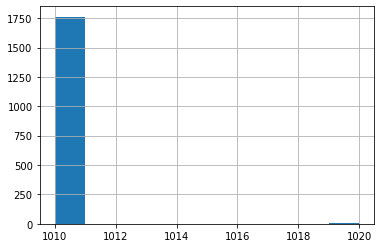

In [4]:
table_G["Categoria"].hist()

In [14]:
table_G["Categoria"].value_counts().to_dict()

{1010: 1762, 1020: 3}

# Table G. VALUE ADDED TAX (VAT)

In [15]:
# Unique categories
table_G["Categoria"].unique()

array([1010, 1020], dtype=int64)

In [16]:
# Frequency of the different categories
table_G["Categoria"].value_counts()

1010    1762
1020       3
Name: Categoria, dtype: int64

* 1010: Main VAT system in the farm
* 1020: Minority VAT system in the farm

In [17]:
# Unique regimes
table_G["Regimen"].unique()

array([2, 1], dtype=int64)

Regime is expressed as **C**: **VAT system code**. It can have vlaues of 1 and 2 only.  
* **1**: to indicate a normal VAT system, that is the VAT system which is guaranteed to be income-neutral for agricultural holdings as the VAT balance is cleared with tax authorities.  
* **2**: to  indicate  a  partial  offsetting  VAT  system,  that  is  the  VAT  system which  does  not guarantee  to  be  income-neutral  for  agricultural  holdings,  although  it  may  contain  some approximate mechanism to offset VAT paid and received.  

**NI**: balance of VAT in non-investments transactions (provided only for VAT system 2).  
**I**: balance of VAT in investment transactions (provided only for VAT system 2).

For the normal VAT system only its indication is entered (G_VA_1010_C = 1 or G_VA_1020 = 1) and no other values are reported for that particular category.  
If the holding is subject to the partial offsetting system of VAT (G_VA_1010_C = 2 or G_VA_1020_C = 2) then the VAT balance non-investments transactions and VAT balance incestment transactions have to be provided

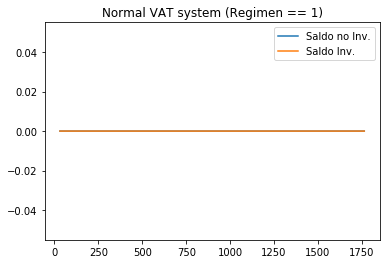

In [18]:
plt.title("Normal VAT system (Regimen == 1)")
plt.plot(table_G[table_G["Regimen"] == 1]["Saldo no Inv."])
plt.plot(table_G[table_G["Regimen"] == 1]["Saldo Inv."])
plt.legend(("Saldo no Inv.", "Saldo Inv."))
plt.show()

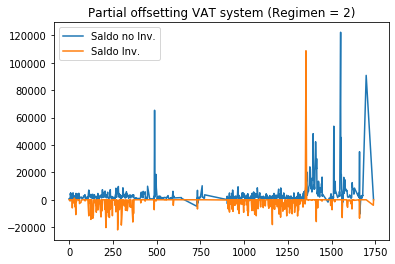

In [19]:
plt.title("Partial offsetting VAT system (Regimen = 2)")
plt.plot(table_G[table_G["Regimen"] == 2]["Saldo no Inv."])
plt.plot(table_G[table_G["Regimen"] == 2]["Saldo Inv."])
plt.legend(("Saldo no Inv.", "Saldo Inv."))
plt.show()

## Sorting dataframe

In [9]:
def _sortingDF(DF, columns):
    """
    Ordering dataframe by columns_values
    """
    
    newDF = pd.DataFrame(columns=DF.columns)
    
    # Building dictionary to store n unique values for each column
    dict_ = {}
    
    for col in columns:
        dict_[col] = sorted(DF[col].unique())
    a = 0
    # Building lists containing nunique values for each list
    # Loop exploitations
    for expl in dict_["Explotacion"]:
        
        # Loop years
        for y in dict_["Ejercicio"]:
            
            # Loop Categories
            for cat in dict_["Categoria"]:
                
                dataset = DF[(DF["Explotacion"]==expl) & (DF["Ejercicio"]==y) & (DF["Categoria"]==cat)]
                    
                if not dataset.empty:
                    newDF = pd.concat([newDF, dataset])
                    
    return newDF

In [21]:
table_G_sorted = _sortingDF(table_G, ["Explotacion", "Ejercicio", "Categoria"])

In [22]:
table_G_sorted

Ejercicio Explotacion Categoria Regimen Saldo no Inv. Saldo Inv.
1         2014       55284      1010       2           439          0
0         2015       55284      1010       2           523          0
2         2014       55290      1010       2           981          0
4         2015       55290      1010       2           288          0
3         2016       55290      1010       2           289          0
...        ...         ...       ...     ...           ...        ...
1760      2018       92886      1010       1             0          0
1761      2018       92887      1010       1             0          0
1762      2018       92888      1010       1             0          0
1763      2018       92889      1010       1             0          0
1764      2018       92890      1010       1             0          0

[1765 rows x 6 columns]

In [20]:
table_G["Regimen"].value_counts()

1    1114
2     651
Name: Regimen, dtype: int64

## New column names

In [12]:
# Getting a table similar to contained in pdf file withthe new column names
for code in [1010, 1020]:
    char = ""
    for j in ["C", "NI", "I"]:
        char += '"G_VA_{}_{}", '.format(code, j)
        #print("G_VA_{}_{}".format(code, j))
    print(char)

"G_VA_1010_C", "G_VA_1010_NI", "G_VA_1010_I", 
"G_VA_1020_C", "G_VA_1020_NI", "G_VA_1020_I", 


In [13]:
new_cols_names = [
    "G_VA_1010_C", "G_VA_1010_NI", "G_VA_1010_I", 
    "G_VA_1020_C", "G_VA_1020_NI", "G_VA_1020_I"]

## Link

In [14]:
#    'Ejercicio': , 
#    'Explotacion': , 
#    'Categoria': , 

link = {
    'Regimen': "C",
    'Saldo no Inv.': "NI",   
    'Saldo Inv.': "I" 
    }

In [15]:
table_G.columns

Index(['Ejercicio', 'Explotacion', 'Categoria', 'Regimen', 'Saldo no Inv.',
       'Saldo Inv.'],
      dtype='object')

In [16]:

def _newColumnName(oc_name, cat):
    """
    Compossing new column name from old column name and code.
    """
    
    # Link between old columns and new column names
    link = {
        'Regimen': "C",
        'Saldo no Inv.': "NI",   
        'Saldo Inv.': "I" 
        }
    
    return "G_VA_{}_{}".format(cat, link[oc_name])


def _DFconverssion(DF, new_column_names):
    """
    Dataframe converssion with new characterisation
    DF: original dataframe
    new_col_names: new columns names
    
    The new rows built synthesise all categories given for a explitation in a certain year.
    """
    
    # Building new dataframe
    newDF = pd.DataFrame(columns=["Explotacion", "Ejercicio"]+new_column_names)
    
    # Sorted unique values extraction
    exploitations = sorted(DF.Explotacion.unique())
    
    # Definition of start index
    index = 0
    
    # Loop all exploitations in the table
    for expl in exploitations:
        
        # Subset for the current exploitation
        sub_expl = DF[DF["Explotacion"] == expl]
        
        # Getting all years for the current exploitation
        years = sorted(sub_expl.Ejercicio.unique())
        
        # Loop all years for the selected exploitation
        for y in years:
            
            # Extract subsets corresponding to expl and y
            sub_expl_y = sub_expl[sub_expl["Ejercicio"] == y]
            
            # Number of categories
            categories = sorted(sub_expl_y["Categoria"].unique())
            
            # Building new row
            new_row = pd.DataFrame(columns=["Explotacion", "Ejercicio"]+new_column_names, index=[index])
            
            # Assignation of new row identificators
            new_row.at[index, "Ejercicio"] = y
            new_row.at[index, "Explotacion"] = expl
            
            # Loop categories
            for cat in categories:
                
                # Getting the row for Exploitation/Year/Category
                row = sub_expl_y[sub_expl_y["Categoria"] == cat]
                
                # Loop row columns
                for oc in row.columns:
                    
                    # Other column not identificative
                    if not oc in ["Ejercicio", "Explotacion", "Categoria"]:
                        
                        # Item selection
                        item = row[oc].item()

                        # Compossing new name
                        newName = _newColumnName(oc, cat)
                        
                        # Item asignation
                        new_row.at[index, newName] = item
                
            # DF concatenation
            newDF = pd.concat([newDF, new_row])
            
            # Increasing row index
            index += 1
            
    return newDF        

In [17]:
# Table G converssion to FADN structure
new_table_G = _DFconverssion(table_G, new_cols_names)

In [18]:
new_table_G.head()

Explotacion Ejercicio G_VA_1010_C G_VA_1010_NI G_VA_1010_I G_VA_1020_C  \
0       55284      2014           2          439           0         NaN   
1       55284      2015           2          523           0         NaN   
2       55290      2014           2          981           0         NaN   
3       55290      2015           2          288           0         NaN   
4       55290      2016           2          289           0         NaN   

  G_VA_1020_NI G_VA_1020_I  
0          NaN         NaN  
1          NaN         NaN  
2          NaN         NaN  
3          NaN         NaN  
4          NaN         NaN

In [23]:
table_G_sorted.head()

Ejercicio Explotacion Categoria Regimen Saldo no Inv. Saldo Inv.
1      2014       55284      1010       2           439          0
0      2015       55284      1010       2           523          0
2      2014       55290      1010       2           981          0
4      2015       55290      1010       2           288          0
3      2016       55290      1010       2           289          0

In [25]:
# Saving table G with FADN structure
new_table_G.to_csv("table_G.csv", index=False)

## Checking

In [72]:
# Loop all rows
for i in range(table_G.shape[0]):
    
    # Getting exploitation
    ex = table_G.iloc[i]["Explotacion"]
    
    # Getting year
    year = table_G.iloc[i]["Ejercicio"]
    
    # Getting category
    cat = table_G.iloc[i]["Categoria"]
    
    # Getting regime
    old_reg = table_G.iloc[i]["Regimen"]
    
    # Getting balance of VAT in non-investments transactions
    old_vni = table_G.iloc[i]["Saldo no Inv."]
    
    # Getting balance of VAT in investment transactions (provided only for VAT system 2).
    old_vi = table_G.iloc[i]["Saldo Inv."]
    
    # Finding in new table
    # Regime
    new_reg = new_table_G[(new_table_G["Ejercicio"] == year) & (new_table_G["Explotacion"] == ex)]["G_VA_{}_C".format(cat)].item()

    # Balance of VAT in non-investments transactions
    new_vni = new_table_G[(new_table_G["Ejercicio"] == year) & (new_table_G["Explotacion"] == ex)]["G_VA_{}_NI".format(cat)].item()
    
    # Balance of VAT in non-investments transactions
    new_vi = new_table_G[(new_table_G["Ejercicio"] == year) & (new_table_G["Explotacion"] == ex)]["G_VA_{}_I".format(cat)].item()
    
    # If any new item differs from the old, it return error
    if old_reg != new_reg:
        print("ERROR")
    if old_vni != new_vni:
        print("ERROR")
    if old_vi != new_vi:
        print("ERROR")
        